In [1]:
#Libraries

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Data Cleaning

In [2]:
investments = pd.read_excel('investments_VC.xlsx',encoding="ISO-8859-1")
investments = investments[investments['name'].notna()]
investments = investments.drop(['permalink','homepage_url','category_list','state_code','region','city',' funding_total_usd '],axis=1)
investments = investments.rename(columns={' market ':'market'})
investments.columns

Index(['name', 'market', 'classification', 'status', 'country_code',
       'location', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [3]:
investments = investments[investments['market'].notna()]
investments = investments[investments['founded_year'].notna()]
investments = investments[investments['country_code'].notna()]
investments = investments[investments['status'].notna()]
investments['total_funding_usd'] = investments[investments.columns[12:]].sum(axis=1)
investments.founded_year = investments.founded_year.astype(int)
investments.funding_rounds = investments.funding_rounds.astype(int)
investments

name                 market       classification  \
0                   #waywire                  News   News and Publishing   
2          'Rock' Your Paper            Publishing   News and Publishing   
3          (In)Touch Network           Electronics            Technology   
4         -R- Ranch and Mine               Tourism           Hospitality   
8           004 Technologies              Software            Technology   
...                      ...                    ...                  ...   
49430       Zyraz Technology         Biotechnology            Technology   
49432             Zytoprotec         Biotechnology            Technology   
49433                  Zzish             Education             Education   
49435  Zzzzapp Wireless ltd.       Web Development            Technology   
49437                  [x+1]   Enterprise Software            Technology   

          status country_code location  funding_rounds           founded_at  \
0       acquired          USA      USA               1  2012-06-01 00:00:00   
2      operating          EST   Europe               1  2012-10-26 00:00:00   
3      operating          GBR   Europe               1  2011-04-01 00:00:00   
4      operating          USA      USA               2  2014-01-01 00:00:00   
8      operating          USA      USA               1  2010-01-01 00:00:00   
...          ...          ...      ...             ...                  ...   
49430     closed          MYS      RoW               4  1994-01-01 00:00:00   
49432  operating          AUT   Europe               1  2007-01-01 00:00:00   
49433  operating          GBR   Europe               1  2013-01-28 00:00:00   
49435  operating          HRV   Europe               5  2012-05-13 00:00:00   
49437  operating          USA      USA               4  1999-01-01 00:00:00   

      founded_month founded_quarter  ...  product_crowdfunding     round_A  \
0           2012-06         2012-Q2  ...                   0.0         0.0   
2           2012-10         2012-Q4  ...                   0.0         0.0   
3           2011-04         2011-Q2  ...                   0.0         0.0   
4           2014-01         2014-Q1  ...                   0.0         0.0   
8           2010-01         2010-Q1  ...                   0.0         0.0   
...             ...             ...  ...                   ...         ...   
49430       1994-01         1994-Q1  ...                   0.0   7991547.0   
49432       2007-01         2007-Q1  ...                   0.0   2686600.0   
49433       2013-01         2013-Q1  ...                   0.0         0.0   
49435       2012-05         2012-Q2  ...                   0.0         0.0   
49437       1999-01         1999-Q1  ...                   0.0  16000000.0   

          round_B  round_C  round_D  round_E  round_F  round_G  round_H  \
0             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...           ...      ...      ...      ...      ...      ...      ...   
49430         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
49432         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
49433         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
49435         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
49437  10000000.0      0.0      0.0      0.0      0.0      0.0      0.0   

       total_funding_usd  
0              1750000.0  
2                40000.0  
3              1500000.0  
4                60000.0  
8                    0.0  
...                  ...  
49430         23411424.0  
49432          5373200.0  
49433           320000.0  
49435            97398.0  
49437         71000000.0  


In [4]:
investments.country_code.unique()

array(['USA', 'EST', 'GBR', 'CHL', 'FRA', 'CHN', 'CAN', 'AUS', 'ROM',
       'NLD', 'SWE', 'DNK', 'IND', 'SGP', 'DEU', 'IRL', 'ITA', 'ISR',
       'ESP', 'THA', 'RUS', 'NZL', 'BEL', 'CZE', 'CHE', 'BRA', 'HUN',
       'BWA', 'KOR', 'HKG', 'FIN', 'TUR', 'JPN', 'CRI', 'PRT', 'ARG',
       'TWN', 'COL', 'NOR', 'UKR', 'LTU', 'ZAF', 'AUT', 'PHL', 'ISL',
       'JOR', 'VNM', 'GHA', 'PER', 'POL', 'IDN', 'ALB', 'UGA', 'HRV',
       'LBN', 'ARE', 'NGA', 'EGY', 'LUX', 'PAK', 'MEX', 'MYS', 'BHS',
       'ARM', 'MDA', 'DZA', 'BGR', 'TUN', 'TZA', 'CYP', 'KEN', 'NPL',
       'BHR', 'CMR', 'SRB', 'SAU', 'CYM', 'BRN', 'SLV', 'GRC', 'LVA',
       'PAN', 'SVK', 'ECU', 'MLT', 'NIC', 'SVN', 'TTO', 'MMR', 'BGD',
       'DOM', 'MAR', 'URY', 'GTM', 'AZE', 'MCO', 'UZB', 'OMN', 'BLR',
       'BMU', 'JAM', 'KHM', 'MUS', 'SOM', 'MKD', 'GIB', 'SYC', 'MAF',
       'LAO'], dtype=object)

In [5]:
new = investments.corr()
new.total_funding_usd
investments[['total_funding_usd','debt_financing']]
investments['total_funding_usd'].sum()

722099810529.0

In [6]:
investments['debt_financing'].sum()

72857016734.0

In [7]:
investments.groupby('classification')['total_funding_usd'].mean()
country =investments.groupby('country_code')['country_code'].count().sort_values(ascending=False).to_frame()
country = country.rename(columns={0: "number"})
country = country.loc[country['country_code'] > 499, ['country_code']]
country

country_code
country_code              
USA                  22220
GBR                   1901
CAN                   1040
DEU                    702
IND                    646
CHN                    638
FRA                    621
ISR                    575

## 21st companies get more funding than 20th companies - without year adjustment

In [8]:
from scipy.stats import ttest_ind

In [9]:
funding = investments
funding['other'] = funding['angel']+funding['equity_crowdfunding']+funding['product_crowdfunding']+funding['seed']+funding['venture']
funding['debt'] = funding['debt_financing']+funding['post_ipo_debt']

In [10]:
companies_21st = funding.loc[funding.founded_year > 1999 , ['other']]
companies_21st = companies_21st['other'].tolist()

np.mean(companies_21st)

9046622.18388774

In [11]:
companies_20th = funding.loc[funding.founded_year < 2000 , ['other']]
companies_20th = companies_20th['other'].tolist()
np.mean(companies_20th)

12678231.703809524

In [12]:
sample_mean = np.mean(companies_21st) - np.mean(companies_20th)
standard_error = np.sqrt(np.var(companies_21st)/len(companies_21st) + np.var(companies_20th)/len(companies_20th))

normal = norm(sample_mean,standard_error)

lower, upper = normal.interval(0.95)

lower, upper

(-4600789.3881722065, -2662429.65167136)

## 21st companies get more funding than 20th companies - with year adjustment

In [13]:
funding['years'] = 2020 - funding['founded_year'].astype(int) 
funding['other_funding_per_year'] = funding['other'] / funding['years']
funding['debt_per_year'] = funding['debt'] / funding['years']

In [14]:
companies_21st = funding.loc[funding.founded_year > 1999 , ['other_funding_per_year']]
companies_21st = companies_21st['other_funding_per_year'].tolist()

np.mean(companies_21st)

720071.5314879376

In [15]:
companies_20th = funding.loc[funding.founded_year < 2000 , ['other_funding_per_year']]
companies_20th = companies_20th['other_funding_per_year'].tolist()
np.mean(companies_20th)

519521.4456066432

In [16]:
sample_mean = np.mean(companies_21st) - np.mean(companies_20th)
standard_error = np.sqrt(np.var(companies_21st)/len(companies_21st) + np.var(companies_20th)/len(companies_20th))

normal = norm(sample_mean,standard_error)

lower, upper = normal.interval(0.95)

lower, upper

(151991.22383578162, 249108.94792680704)

### 21st companies get more seed, venture, angel and crowdfunding

In [17]:
companies_21st_df = investments.loc[investments.founded_year > 1999]
companies_21st_df['other'] = companies_21st_df['seed'] + companies_21st_df['venture'] + companies_21st_df['equity_crowdfunding'] + companies_21st_df['angel'] + companies_21st_df['product_crowdfunding']
companies_21st_df['debt'] = companies_21st_df['debt_financing'] + companies_21st_df['post_ipo_debt']

/Users/telmabatista/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/telmabatista/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
np.mean(companies_21st_df['other'].tolist())

9046622.18388774

In [19]:
np.mean(companies_21st_df['funding_rounds'].tolist())

1.879041397240184

In [20]:
np.mean(companies_21st_df['debt'].tolist())

1063715.1471568563

In [21]:
companies_20th_df = investments.loc[investments.founded_year < 2000]
companies_20th_df['other'] = companies_20th_df['seed'] + companies_20th_df['venture'] + companies_20th_df['equity_crowdfunding'] + companies_20th_df['angel'] + companies_20th_df['product_crowdfunding'] 
companies_20th_df['debt'] = companies_20th_df['debt_financing'] + companies_20th_df['post_ipo_debt']

/Users/telmabatista/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/telmabatista/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
np.mean(companies_20th_df['other'].tolist())

12678231.703809524

In [23]:
np.mean(companies_20th_df['funding_rounds'].tolist())

1.7777777777777777

In [24]:
np.mean(companies_20th_df['debt'].tolist())

15560698.52984127

### Funding per year

In [25]:
funding = investments
funding['other'] = funding['angel']+funding['equity_crowdfunding']+funding['product_crowdfunding']+funding['seed']+funding['venture']
funding['debt'] = funding['debt_financing']+funding['post_ipo_debt']
funding['years'] = 2020 - funding['founded_year'].astype(int) 
funding['other_funding_per_year'] = funding['other'] / funding['years']
funding['debt_per_year'] = funding['debt'] / funding['years']

funding

name                 market       classification  \
0                   #waywire                  News   News and Publishing   
2          'Rock' Your Paper            Publishing   News and Publishing   
3          (In)Touch Network           Electronics            Technology   
4         -R- Ranch and Mine               Tourism           Hospitality   
8           004 Technologies              Software            Technology   
...                      ...                    ...                  ...   
49430       Zyraz Technology         Biotechnology            Technology   
49432             Zytoprotec         Biotechnology            Technology   
49433                  Zzish             Education             Education   
49435  Zzzzapp Wireless ltd.       Web Development            Technology   
49437                  [x+1]   Enterprise Software            Technology   

          status country_code location  funding_rounds           founded_at  \
0       acquired          USA      USA               1  2012-06-01 00:00:00   
2      operating          EST   Europe               1  2012-10-26 00:00:00   
3      operating          GBR   Europe               1  2011-04-01 00:00:00   
4      operating          USA      USA               2  2014-01-01 00:00:00   
8      operating          USA      USA               1  2010-01-01 00:00:00   
...          ...          ...      ...             ...                  ...   
49430     closed          MYS      RoW               4  1994-01-01 00:00:00   
49432  operating          AUT   Europe               1  2007-01-01 00:00:00   
49433  operating          GBR   Europe               1  2013-01-28 00:00:00   
49435  operating          HRV   Europe               5  2012-05-13 00:00:00   
49437  operating          USA      USA               4  1999-01-01 00:00:00   

      founded_month founded_quarter  ...  round_E round_F round_G  round_H  \
0           2012-06         2012-Q2  ...      0.0     0.0     0.0      0.0   
2           2012-10         2012-Q4  ...      0.0     0.0     0.0      0.0   
3           2011-04         2011-Q2  ...      0.0     0.0     0.0      0.0   
4           2014-01         2014-Q1  ...      0.0     0.0     0.0      0.0   
8           2010-01         2010-Q1  ...      0.0     0.0     0.0      0.0   
...             ...             ...  ...      ...     ...     ...      ...   
49430       1994-01         1994-Q1  ...      0.0     0.0     0.0      0.0   
49432       2007-01         2007-Q1  ...      0.0     0.0     0.0      0.0   
49433       2013-01         2013-Q1  ...      0.0     0.0     0.0      0.0   
49435       2012-05         2012-Q2  ...      0.0     0.0     0.0      0.0   
49437       1999-01         1999-Q1  ...      0.0     0.0     0.0      0.0   

       total_funding_usd       other        debt  years  \
0              1750000.0   1750000.0         0.0      8   
2                40000.0     40000.0         0.0      8   
3              1500000.0   1500000.0         0.0      9   
4                60000.0     60000.0         0.0      6   
8                    0.0         0.0         0.0     10   
...                  ...         ...         ...    ...   
49430         23411424.0   9998910.0         0.0     26   
49432          5373200.0   2686600.0         0.0     13   
49433           320000.0    320000.0         0.0      7   
49435            97398.0     71525.0         0.0      8   
49437         71000000.0  28000000.0  17000000.0     21   

       other_funding_per_year  debt_per_year  
0                2.187500e+05       0.000000  
2                5.000000e+03       0.000000  
3                1.666667e+05       0.000000  
4                1.000000e+04       0.000000  
8                0.000000e+00       0.000000  
...                       ...            ...  
49430            3.845735e+05       0.000000  
49432            2.066615e+05       0.000000  
49433            4.571429e+04       0.000000  
49435            8.940625e+03       0.000000  

In [26]:
funding = pd.pivot_table(funding, index = 'founded_year', values = ['other_funding_per_year','debt_per_year','years'], aggfunc = np.mean)
funding = funding.reset_index()
funding

founded_year  debt_per_year  other_funding_per_year  years
0           1902       0.000000            26271.186441    118
1           1903   79487.179487                0.000000    117
2           1906       0.000000            49707.602339    114
3           1908       0.000000            51693.750000    112
4           1910       0.000000              454.545455    110
..           ...            ...                     ...    ...
95          2010   25578.982400           649800.390511     10
96          2011   37949.659133           506899.746641      9
97          2012   32916.167790           374317.980189      8
98          2013   20669.763163           274540.412444      7
99          2014    5180.673605           144084.145222      6

[100 rows x 4 columns]

In [27]:
companies_21st = funding.loc[funding.founded_year > 1999 , ['debt_per_year','other_funding_per_year','years']]
companies_20th = funding.loc[funding.founded_year < 2000 , ['debt_per_year','other_funding_per_year','years']]

companies_21st

debt_per_year  other_funding_per_year  years
85   80001.278615            9.057404e+05     20
86  202095.213099            9.481889e+05     19
87   75945.273321            1.072306e+06     18
88  202006.844303            1.109622e+06     17
89  132393.112028            1.363132e+06     16
90  217347.507490            1.240642e+06     15
91   73191.682774            1.121304e+06     14
92  284471.820779            1.213827e+06     13
93   67997.892704            9.117491e+05     12
94   83449.326794            8.291433e+05     11
95   25578.982400            6.498004e+05     10
96   37949.659133            5.068997e+05      9
97   32916.167790            3.743180e+05      8
98   20669.763163            2.745404e+05      7
99    5180.673605            1.440841e+05      6

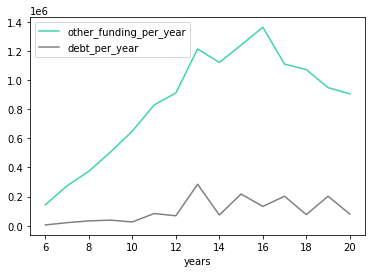

In [28]:
ax = plt.gca()

companies_21st.plot(kind='line',x='years',y='other_funding_per_year', color='#3ed4af', ax=ax)
companies_21st.plot(kind='line',x='years',y='debt_per_year', color='grey', ax=ax)

plt.show()

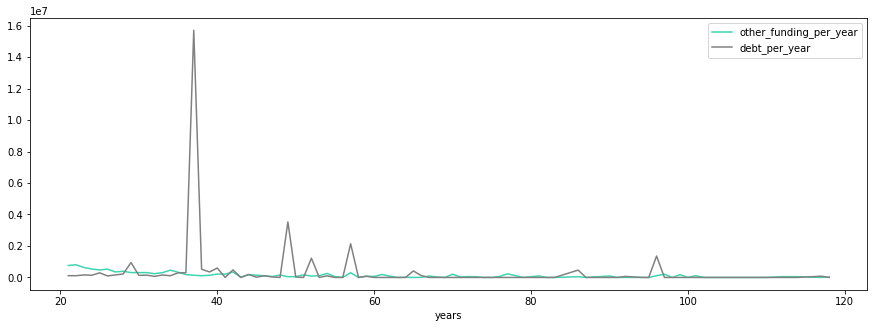

In [29]:
ax = plt.gca()

companies_20th.plot(kind='line',x='years',y='other_funding_per_year', color='#3ed4af', ax=ax, figsize=(15,5))
companies_20th.plot(kind='line',x='years',y='debt_per_year', color='grey', ax=ax, figsize=(15,5))

plt.show()